<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.370588,24.355807,0.001848,66.728243,66.726678,0.001565
1,0.0,1.0,64.703852,73.550880,-0.000498,148.254235,148.254624,-0.000389
2,0.0,2.0,65.748861,65.207375,0.000399,140.956635,140.956181,0.000454
3,0.0,3.0,26.017368,31.110041,0.003612,67.131021,67.127659,0.003362
4,0.0,4.0,56.109139,53.141451,0.001114,119.251705,119.250636,0.001069
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.084746,66.077583,-0.000686,123.161643,123.162227,-0.000584
19996,999.0,16.0,79.043994,25.772266,-0.002471,114.813789,114.815838,-0.002050
19997,999.0,17.0,84.897095,46.350229,0.001679,141.249002,141.247123,0.001879
19998,999.0,18.0,70.384361,67.899236,-0.000358,148.283239,148.283574,-0.000335


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.370588  24.355807  0.001848   66.728243   66.726678  0.001565
      1.0    64.703852  73.550880 -0.000498  148.254235  148.254624 -0.000389
      2.0    65.748861  65.207375  0.000399  140.956635  140.956181  0.000454
      3.0    26.017368  31.110041  0.003612   67.131021   67.127659  0.003362
      4.0    56.109139  53.141451  0.001114  119.251705  119.250636  0.001069
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.084746  66.077583 -0.000686  123.161643  123.162227 -0.000584
      16.0   79.043994  25.772266 -0.002471  114.813789  114.815838 -0.002050
      17.0   84.897095  46.350229  0.001679  141.249002  141.247123  0.001879
      18.0   70.384361  67.899236 -0.000358  148.283239  148.283574 -0.000335
      19.0   70.112748  63.774527 -0.000414  143.886860  143.887210 -0.000350

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.370588  24.355807  0.001848   66.728243   66.726678  0.001565
      1.0    64.703852  73.550880 -0.000498  148.254235  148.254624 -0.000389
      2.0    65.748861  65.207375  0.000399  140.956635  140.956181  0.000454
      3.0    26.017368  31.110041  0.003612   67.131021   67.127659  0.003362
      4.0    56.109139  53.141451  0.001114  119.251705  119.250636  0.001069
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.084746  66.077583 -0.000686  123.161643  123.162227 -0.000584
      16.0   79.043994  25.772266 -0.002471  114.813789  114.815838 -0.002050
      17.0   84.897095  46.350229  0.001679  141.249002  141.247123  0.001879
      18.0   70.384361  67.899236 -0.000358  148.283239  148.283574 -0.000335
      19.0   70.112748  63.774527 -0.000414  143.886860  143.887210 -0.000350

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.370588,24.355807,0.001848,66.728243,66.726678,0.001565
1,0.0,1.0,64.703852,73.550880,-0.000498,148.254235,148.254624,-0.000389
2,0.0,2.0,65.748861,65.207375,0.000399,140.956635,140.956181,0.000454
3,0.0,3.0,26.017368,31.110041,0.003612,67.131021,67.127659,0.003362
4,0.0,4.0,56.109139,53.141451,0.001114,119.251705,119.250636,0.001069
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.084746,66.077583,-0.000686,123.161643,123.162227,-0.000584
19996,999.0,16.0,79.043994,25.772266,-0.002471,114.813789,114.815838,-0.002050
19997,999.0,17.0,84.897095,46.350229,0.001679,141.249002,141.247123,0.001879
19998,999.0,18.0,70.384361,67.899236,-0.000358,148.283239,148.283574,-0.000335


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.370588  24.355807  0.001848   66.728243   66.726678  0.001565
      1.0    64.703852  73.550880 -0.000498  148.254235  148.254624 -0.000389
      2.0    65.748861  65.207375  0.000399  140.956635  140.956181  0.000454
      3.0    26.017368  31.110041  0.003612   67.131021   67.127659  0.003362
      4.0    56.109139  53.141451  0.001114  119.251705  119.250636  0.001069
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.084746  66.077583 -0.000686  123.161643  123.162227 -0.000584
      16.0   79.043994  25.772266 -0.002471  114.813789  114.815838 -0.002050
      17.0   84.897095  46.350229  0.001679  141.249002  141.247123  0.001879
      18.0   70.384361  67.899236 -0.000358  148.283239  148.283574 -0.000335
      19.0   70.112748  63.774527 -0.000414  143.886860  143.887210 -0.000350

[20000 rows x 6 columns]

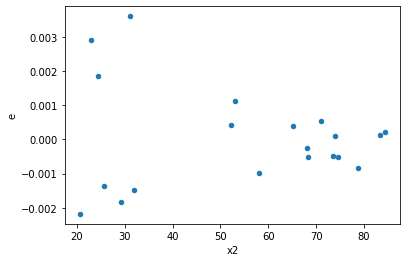

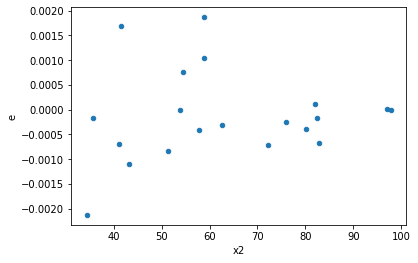

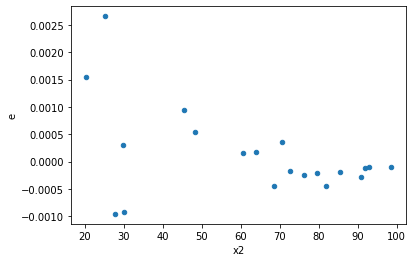

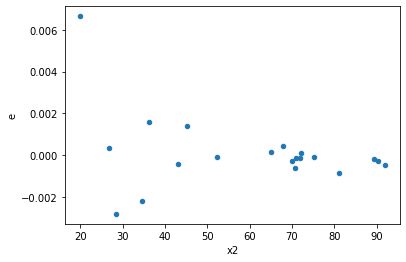

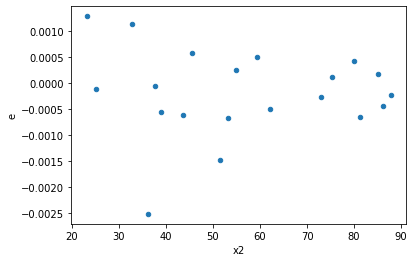

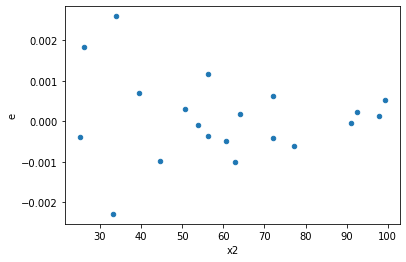

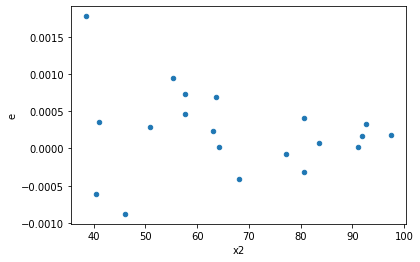

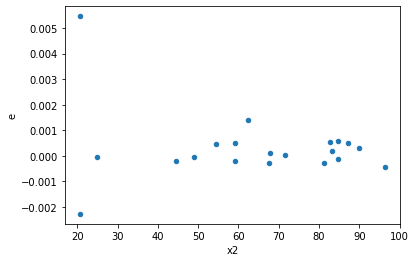

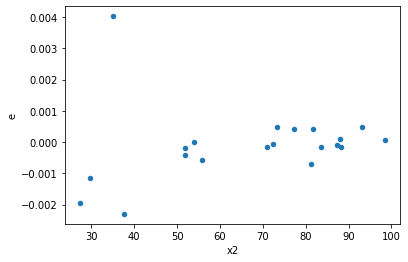

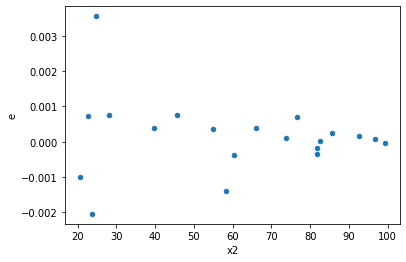

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,11.0,6.34432901128924e-07,3.670422047648413e-05,1.2688658022578479e-07,3.3367473160440117e-06,26.297086028376917,1.813585906629278e-05,0.9999909320704669,9.06792953314639e-06,Reject001=0 : Heteroscedasticity
2.0,6.0,10.0,7.460032062813166e-08,6.308847997389796e-06,1.2433386771355277e-08,6.308847997389796e-07,50.74118672093808,1.2947648875272222e-06,0.9999993526175562,6.473824437636111e-07,Reject001=0 : Heteroscedasticity
4.0,7.0,9.0,4.083555487170805e-06,8.478212795878475e-06,5.833650695958294e-07,9.420236439864973e-07,1.6148098216424853,0.4932018502626252,0.7533990748686874,0.2466009251313126,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,5.460361266622587e-07,2.5593837259613635e-06,6.825451583278233e-08,3.1992296574517044e-07,4.687205847726678,0.04260459613921119,0.9786977019303944,0.021302298069605596,Reject001=1 : Homoscedasticity
7.0,7.0,9.0,1.83709164996326e-06,2.997175073507232e-05,2.6244166428046575e-07,3.3301945261191464e-06,12.689275291899685,0.0010358908902716735,0.9994820545548642,0.0005179454451358367,Reject001=0 : Heteroscedasticity
9.0,8.0,8.0,1.8610686004418222e-06,1.7996763433452806e-05,2.3263357505522778e-07,2.2495954291816008e-06,9.670123621010172,0.004277974730444445,0.9978610126347778,0.0021389873652222224,Reject001=0 : Heteroscedasticity
11.0,9.0,7.0,1.598731127939322e-06,2.268285633271156e-05,1.77636791993258e-07,3.2404080475302227e-06,18.24176180604077,0.0009203253844933812,0.9995398373077533,0.0004601626922466906,Reject001=0 : Heteroscedasticity
14.0,8.0,8.0,1.692912437145203e-06,9.58949581118047e-06,2.1161405464315039e-07,1.1986869763975588e-06,5.664496048804187,0.024234707955406165,0.9878826460222969,0.012117353977703083,Reject001=1 : Homoscedasticity
15.0,8.0,8.0,1.8448804865587862e-06,1.6426649253699626e-05,2.3061006081984828e-07,2.0533311567124532e-06,8.903909696795527,0.005656617133527719,0.9971716914332361,0.0028283085667638597,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,11.0,6.34432901128924e-07,3.670422047648413e-05,1.2688658022578479e-07,3.3367473160440117e-06,26.297086028376917,1.813585906629278e-05,Reject001=0 : Heteroscedasticity
1.0,9.0,7.0,9.65399951775222e-06,3.6036159265936427e-06,1.07266661308358e-06,5.148022752276632e-07,0.4799275645839001,0.3017432540023423,Reject001=1 : Homoscedasticity
2.0,6.0,10.0,7.460032062813166e-08,6.308847997389796e-06,1.2433386771355277e-08,6.308847997389796e-07,50.74118672093808,1.2947648875272222e-06,Reject001=0 : Heteroscedasticity
3.0,6.0,10.0,5.358388860265103e-05,2.4959156891029176e-06,8.930648100441838e-06,2.495915689102918e-07,0.027947755426388752,0.00029876668081680143,Reject001=0 : Heteroscedasticity
4.0,7.0,9.0,4.083555487170805e-06,8.478212795878475e-06,5.833650695958294e-07,9.420236439864973e-07,1.6148098216424853,0.4932018502626252,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,9.439001234520753e-06,4.173006587540628e-06,1.1798751543150941e-06,5.216258234425785e-07,0.442102557660329,0.26942217800786206,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,5.460361266622587e-07,2.5593837259613635e-06,6.825451583278233e-08,3.1992296574517044e-07,4.687205847726678,0.04260459613921119,Reject001=1 : Homoscedasticity
7.0,7.0,9.0,1.83709164996326e-06,2.997175073507232e-05,2.6244166428046575e-07,3.3301945261191464e-06,12.689275291899685,0.0010358908902716735,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,8.287859962444175e-06,6.840381727866663e-07,1.0359824953055219e-06,8.550477159833329e-08,0.08253495786443482,0.0019593743974657555,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    502
Reject001=1 : Homoscedasticity      498
Name: Result_test, dtype: int64